In [1]:
from econml.dml import LinearDML
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, ElasticNetCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from model_selection import SearchEstimatorList
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [4]:
url = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/401k.csv"
data_df = pd.read_csv(url)
# pd.set_option('display.max_columns', None)
data_df.head()

,ira,a401,hval,hmort,hequity,nifa,net_nifa,tfa,net_tfa,tfa_he,...,i3,i4,i5,i6,i7,a1,a2,a3,a4,a5
0,0,0,69000,60150,8850,100,-3300,100,-3300,5550,...,1,0,0,0,0,0,1,0,0,0
1,0,0,78000,20000,58000,61010,61010,61010,61010,119010,...,0,1,0,0,0,0,0,0,1,0
2,1800,0,200000,15900,184100,7549,7049,9349,8849,192949,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,2487,-6013,2487,-6013,-6013,...,0,0,1,0,0,1,0,0,0,0
4,0,0,300000,90000,210000,10625,-2375,10625,-2375,207625,...,0,1,0,0,0,0,0,1,0,0


In [5]:
# data_df.columns
feature_cols = ["age", "inc", "fsize", "educ", "db", "marr", "male", "twoearn", "pira", "nohs", "hs", "smcol", "col", "hown"]
X = data_df[feature_cols]
Y = data_df['net_tfa']
T = data_df['p401']
# T
X, X_val, T, T_val, Y, Y_val = train_test_split(X, T, Y, train_size=0.6, shuffle=True, random_state=123)
X_val, X_test, T_val, T_test, Y_val, Y_test = train_test_split(X_val, T_val, Y_val, train_size=.5, shuffle=True, random_state=123)

In [9]:
#Find the best model_y
alpha = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

models_y = [
('Linear Regression', ElasticNetCV(alphas=alpha), {}),
('Forest', RandomForestRegressor(), 
    {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]}),
('gbf', GradientBoostingRegressor(),
    {"n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]}),
('nnet', MLPRegressor(), 
    {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]})
]


# grid_search = GridSearchCV(model_y, param_grid=params, cv=5, n_jobs=-1)
# grid_search.fit(X, Y)
# best_params_y = grid_search.best_params_
# best_model_y = grid_search.best_estimator_
# print(best_model_y)

best_model_y = None
best_mse_y = None

for name, model, param_grid in models_y:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X, Y)
    best_params = grid_search.best_params_
    current_best_model = grid_search.best_estimator_
    current_best_score = grid_search.best_score_
    predictions = current_best_model.predict(X)
    current_best_mse = mean_squared_error(Y, predictions)

    if best_mse_y is None or current_best_mse > best_mse_y:
        best_model_y = current_best_model
        best_mse_y = current_best_mse
    
print(best_model_y)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8426337385333.181, tolerance: 2178927540.4341893
Objective did not converge. You might want to increase the number of iterations. Duality gap: 8204361035626.17, tolerance: 2081077358.9612
Objective did not converge. You might want to increase the number of iterations. Duality gap: 9058140943848.959, tolerance: 2354639336.209279
Objective did not converge. You might want to increase the number of iterations. Duality gap: 8436089258261.842, tolerance: 2191213174.345871
Objective did not converge. You might want to increase the number of iterations. Duality gap: 8961442379239.928, tolerance: 2318980548.62377


MLPRegressor(batch_size=250, hidden_layer_sizes=64)


In [ ]:
#Find the best model_t
models_t = [
('Linear Regression', LogisticRegressionCV(), 
    {'Cs': [1/0.001, 1/0.01, 1/0.1, 1/0.5, 1, 1/2, 1/10, 1/20],
    'max_iter': [1000, 10000]}),
('Forest', RandomForestClassifier(), 
    {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]}),
('gbf', GradientBoostingClassifier(),
    {"n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]}),
('nnet', MLPClassifier(), 
    {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]})
]

best_model_t = None
best_mse_t = None

for name, model, param_grid in models_t:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X, T)
    best_params = grid_search.best_params_
    current_best_model = grid_search.best_estimator_
    current_best_score = grid_search.best_score_
    predictions = current_best_model.predict(X)
    current_best_mse = mean_squared_error(T, predictions)

    if best_mse_t is None or current_best_mse > best_mse_t:
        best_model_t = current_best_model
        best_mse_t = current_best_mse

print(best_model_t)

In [57]:
#Call the linearDML class with auto first-stage models
est = LinearDML(model_y='auto', model_t='auto', random_state=123)
est.fit(Y, T, X=X, W=None)
te_pred = est.effect(X_test)

Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
#Call the linearDML class with the best models on Y and T
est1 = LinearDML(model_y=best_model_y, model_t=best_model_t, random_state=123)
est1.fit(Y, T, X=X, W=None)
te_pred1 = est.effect(X_test)

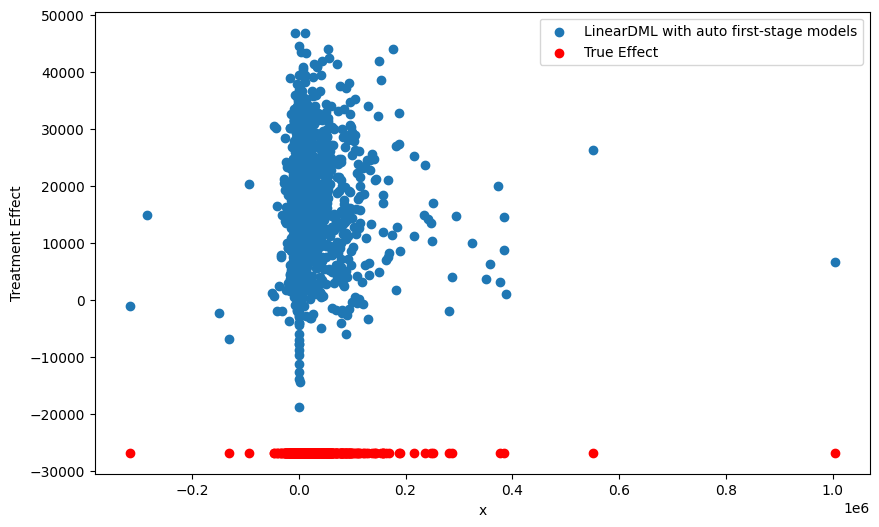

In [58]:
#Plot the graph
plt.figure(figsize=(10,6))
plt.scatter(Y_test, te_pred, label='LinearDML with auto first-stage models')
plt.scatter(Y_test, te_pred1, label='LinearDML with best first-stage models through GridSearch')
# plt.scatter(Y_test, te_pred2, label='LinearDML with Linear first-stage models')
# plt.scatter(Y_test, te_pred3, label='LinearDML with Gradient Boosting first-stage models')
# plt.scatter(Y_test, te_pred4, label='LinearDML with Neural Networks first-stage models')
te_true = Y_test[T_test == 1].mean() - Y_test[T_test == 0].mean()
plt.scatter(Y_test[T_test == 0], np.zeros_like(Y_test[T_test == 0]) - te_true, color='red', label='True Effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.show()

In [ ]:
score={}
score["LinearDML with auto first-stage models"] = est.score(Y_test, T_test, X_test)
score["LinearDML with best first-stage models through Grid search"] = est1.score(Y_test, T_test, X_test)
score

In [ ]:
print("best model selected by score: ",min(score,key=lambda x: score.get(x)))

In [ ]:
mse_te = {}
mse_te['LinearDML with auto first-stage models'] = np.mean((Y_test - te_pred)**2)
mse_te['LinearDML with Random Forest first-stage models'] = np.mean((Y_test - te_pred1)**2)
mse_te

In [ ]:
print("best model selected by MSE of TE: ", min(mse_te, key=lambda x: mse_te.get(x)))